In [311]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import textblob
import pandas
import numpy as np
import nltk
from numpy import array
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import re

%matplotlib inline

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  del sys.path[0]


In [312]:
data = pandas.read_table('SMSSpamCollection', header=None, names = ["tag","message"])
data.groupby('message').describe()

tag                  
                                                   count unique   top freq
message                                                                   
 &lt;#&gt;  in mca. But not conform.                   1      1   ham    1
 &lt;#&gt;  mins but i had to stop somewhere fi...     1      1   ham    1
 &lt;DECIMAL&gt; m but its not a common car her...     1      1   ham    1
 and  picking them up from various points              1      1   ham    1
 came to look at the flat, seems ok, in his 50s...     1      1   ham    1
 gonna let me know cos comes bak from holiday t...     1      1   ham    1
 said kiss, kiss, i can't do the sound effects!...     1      1   ham    1
 says that he's quitting at least5times a day s...     1      1   ham    1
 what number do u live at? Is it 11?                   1      1   ham    1
&lt;#&gt;  am I think? Should say on syllabus          1      1   ham    1
&lt;#&gt;  great loxahatchee xmas tree burning ...     1      1   ham    1
&lt;#&gt;  is fast approaching. So, Wish u a ve...     1      1   ham    1
&lt;#&gt;  w jetton ave if you forgot                  1      1   ham    1
&lt;#&gt; %of pple marry with their lovers... b...     1      1   ham    1
&lt;#&gt; , that's all? Guess that's easy enough       1      1   ham    1
&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.          1      1   ham    1
'An Amazing Quote'' - "Sometimes in life its di...     1      1   ham    1
'Wnevr i wana fal in luv vth my books, My bed f...     1      1   ham    1
(And my man carlos is definitely coming by mu t...     1      1   ham    1
(Bank of Granite issues Strong-Buy) EXPLOSIVE P...     1      1  spam    1
(I should add that I don't really care and if y...     1      1   ham    1
(No promises on when though, haven't even gotte...     1      1   ham    1
(That said can you text him one more time?)            1      1   ham    1
(You didn't hear it from me)                           1      1   ham    1
* Am on a train back from northampton so i'm af...     1      1   ham    1
* Am on my way                                         1      1   ham    1
* FREE* POLYPHONIC RINGTONE Text SUPER to 87131...     1      1  spam    1
* Thought I didn't see you.                            1      1   ham    1
* Was a nice day and, impressively, i was sensi...     1      1   ham    1
* Was really good to see you the other day dude...     1      1   ham    1
...                                                  ...    ...   ...  ...
yes baby! I need to stretch open your pussy!           1      1   ham    1
you are sweet as well, princess. Please tell me...     1      1   ham    1
Ü all write or wat..                                   1      1   ham    1
Ü bot notes oredi... Cos i juz rem i got...            1      1   ham    1
Ü called dad oredi...                                  1      1   ham    1
Ü collecting ur laptop then going to configure ...     1      1   ham    1
Ü come lt 25 n pass to me lar                          1      1   ham    1
Ü comin to fetch us oredi...                           1      1   ham    1
Ü dun need to pick ur gf?                              1      1   ham    1
Ü dun wan to watch infernal affair?                    1      1   ham    1
Ü eatin later but i'm eatin wif my frens now le...     1      1   ham    1
Ü give me some time to walk there.                     1      1   ham    1
Ü go home liao? Ask dad to pick me up at 6...          1      1   ham    1
Ü got wat to buy tell us then ü no need to come...     1      1   ham    1
Ü log off 4 wat. It's sdryb8i                          1      1   ham    1
Ü mean it's confirmed... I tot they juz say oni...     1      1   ham    1
Ü neva tell me how i noe... I'm not at home in ...     1      1   ham    1
Ü no home work to do meh...                            1      1   ham    1
Ü only send me the contents page...                    1      1   ham    1
Ü predict wat time ü'll finish buying?                 1      1   ham    1
Ü r

In [313]:
data["length"] = data.apply(lambda row: len(row.message), axis=1)

,count,mean,std,min,25%,50%,75%,max
tag,,,,,,,,
ham,4825.0,71.482487,58.440652,2.0,33.0,52.0,93.0,910.0
spam,747.0,138.670683,28.873603,13.0,133.0,149.0,157.0,223.0


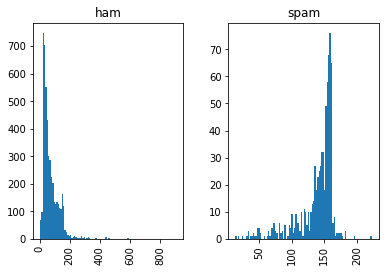

In [314]:
data.hist(column='length', by='tag', bins=100)
data.groupby('tag').length.describe()

In [315]:
data["poundsymb"] = data.apply(lambda row: row.message.count('£'), axis=1)

,count,mean,std,min,25%,50%,75%,max
tag,,,,,,,,
ham,4825.0,0.001036,0.032178,0.0,0.0,0.0,0.0,1.0
spam,747.0,0.433735,0.666581,0.0,0.0,0.0,1.0,3.0


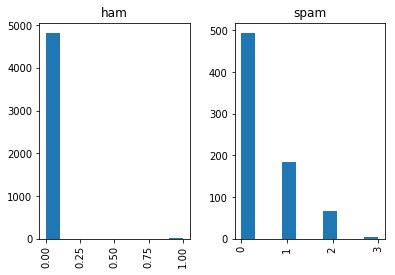

In [295]:
data.hist(column='poundsymb', by='tag', bins=10)
data.groupby('tag').poundsymb.describe()

In [316]:
#for index, row in data.iterrows():
#   row.message = PorterStemmer().stem(row.message)
#print(data)

In [318]:
train_data = data.sample(frac=0.8, random_state=200)
test_data = data.drop(train_data.index)


#print(len(train_data))
#print(len(test_data))
#X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(train_data_bow, train_data["tag"], test_size=0.2,random_state=109)

kfold = KFold(n_splits=5, random_state=None, shuffle=True)


#print(kfold.get_n_splits(data))

#train_messages = train_data['message']

#for index, row in train_data.iterrows():
#    row.message = re.sub('[^A-Za-z]', ' ', row.message)

class CurrencyExtractor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def transform(self, df, y=None):
        return np.array([row.count('£') for row in df])[:,np.newaxis]

    def fit(self, df, y=None):
        return self


#vectorizer = CountVectorizer(stop_words='english',max_features=500)

vectorizer = FeatureUnion([
        ('cv', CountVectorizer(stop_words='english',max_features=500)),
        ('pound_sym', CurrencyExtractor())
    ])


#train_data_bow.shape

# pipeline_svm = Pipeline([
#     ('bow', vectorizer),
#     ('classifier', svm.SVC(kernel='linear')),
# ])

#train_data_bow.shape

for train_index, test_index in kfold.split(train_data):
    trainData = train_data.iloc[train_index]
    testData = train_data.iloc[test_index]
    #print(len(trainData))
    #print(len(testData))
    
    train_data_bow = vectorizer.fit_transform(trainData['message']).toarray()

    svm_spamDetector = svm.SVC(kernel='linear').fit(train_data_bow, trainData["tag"])
    
    y_pred = svm_spamDetector.predict(vectorizer.transform(testData['message']).toarray())
    
    #logreg_spamDetector = linear_model.LogisticRegression(n_jobs=1, C=1e5)
    #logreg_spamDetector = logreg_spamDetector.fit(train_data_bow, trainData["tag"])
    #y_pred = logreg_spamDetector.predict(vectorizer.transform(testData['message']).toarray())
    
#     randomForest_spamDetector = RandomForestClassifier(n_jobs=2, random_state=0)
#     randomForest_spamDetector.fit(train_data_bow, trainData["tag"])
#     y_pred = randomForest_spamDetector.predict(vectorizer.transform(testData['message']).toarray())
    
    accuracy = accuracy_score(testData["tag"],y_pred)
    print('Accuracy: ', accuracy)
    precision = precision_score(testData["tag"],y_pred,average=None)
    print('Precision: ', precision)
    recall = recall_score(testData["tag"],y_pred,average=None)
    print('Recall: ', recall)
    f1 = f1_score(testData["tag"],y_pred,average=None)
    print('F1:',f1, '\n')

train_data_bow = vectorizer.fit_transform(train_data['message']).toarray()


# logreg_spamDetector = linear_model.LogisticRegression(n_jobs=1, C=1e5)
# logreg_spamDetector = logreg_spamDetector.fit(train_data_bow, train_data["tag"])
# scores = model_selection.cross_val_score(logreg_spamDetector, train_data_bow, train_data["tag"], cv=5)
# print(scores)


svm_spamDetector = svm.SVC(kernel='linear')
lb = preprocessing.LabelBinarizer()

y_train = np.array([number[0] for number in lb.fit_transform(train_data["tag"])])

print('SVM')
print("Test set metrics")
svm_spamDetector = svm.SVC(kernel='linear').fit(train_data_bow, train_data["tag"])
y_pred = svm_spamDetector.predict(vectorizer.transform(test_data['message']).toarray())
accuracy = accuracy_score(test_data["tag"],y_pred)
print('Accuracy: ', accuracy)
precision = precision_score(test_data["tag"],y_pred,average=None)
print('Precision: ', precision)
recall = recall_score(test_data["tag"],y_pred,average=None)
print('Recall: ', recall)
f1 = f1_score(test_data["tag"],y_pred,average=None)
print('F1:',f1, '\n')

scores = model_selection.cross_val_score(svm_spamDetector, train_data_bow, y_train, scoring ='f1',cv=5)
print('F-1 over 5 folds: ')
f1_scores = pandas.DataFrame(scores)
print(f1_scores)
print('Aggregate F-1 score: ',scores.mean())

scores = model_selection.cross_val_score(svm_spamDetector, train_data_bow, y_train, scoring ='precision', cv=5)
print('Precision over 5 folds: ')
precision_scores = pandas.DataFrame(scores)
print(precision_scores)
print('Aggregate precision score: ',scores.mean())

scores = model_selection.cross_val_score(svm_spamDetector, train_data_bow, y_train, scoring ='recall', cv=5)
print('Recall over 5 folds: ')
recall_scores = pandas.DataFrame(scores)
print(recall_scores)
print('Aggregate recall score: ',scores.mean())

scores = model_selection.cross_val_score(svm_spamDetector, train_data_bow, y_train, scoring ='accuracy', cv=5)
print('Accuracy over 5 folds: ')
accuracy_scores = pandas.DataFrame(scores)
print(accuracy_scores)
print('Aggregate accuracy score: ',scores.mean())


print('Random forest classifier')
print("Test set metrics")
randomForest_spamDetector = RandomForestClassifier(n_jobs=2, random_state=0)
randomForest_spamDetector.fit(train_data_bow, train_data["tag"])
y_pred = randomForest_spamDetector.predict(vectorizer.transform(test_data['message']).toarray())

accuracy = accuracy_score(test_data["tag"],y_pred)
print('Accuracy: ', accuracy)
precision = precision_score(test_data["tag"],y_pred,average=None)
print('Precision: ', precision)
recall = recall_score(test_data["tag"],y_pred,average=None)
print('Recall: ', recall)
f1 = f1_score(test_data["tag"],y_pred,average=None)
print('F1:',f1, '\n')



scores = model_selection.cross_val_score(randomForest_spamDetector, train_data_bow, y_train, scoring ='f1',cv=5)
print('F-1 over 5 folds: ')
f1_scores = pandas.DataFrame(scores)
print(f1_scores)
print('Aggregate F-1 score: ',scores.mean())

scores = model_selection.cross_val_score(randomForest_spamDetector, train_data_bow, y_train, scoring ='precision', cv=5)
print('Precision over 5 folds: ')
precision_scores = pandas.DataFrame(scores)
print(precision_scores)
print('Aggregate precision score: ',scores.mean())

scores = model_selection.cross_val_score(randomForest_spamDetector, train_data_bow, y_train, scoring ='recall', cv=5)
print('Recall over 5 folds: ')
recall_scores = pandas.DataFrame(scores)
print(recall_scores)
print('Aggregate recall score: ',scores.mean())

scores = model_selection.cross_val_score(randomForest_spamDetector, train_data_bow, y_train, scoring ='accuracy', cv=5)
print('Accuracy over 5 folds: ')
accuracy_scores = pandas.DataFrame(scores)
print(accuracy_scores)
print('Aggregate accuracy score: ',scores.mean())

# scores = model_selection.cross_val_score(randomForest_spamDetector, train_data_bow, train_data["tag"], cv=5)
# print(scores)


#    classifier = nltk.NaiveBayesClassifier.train(train_data)
#    sum += nltk.classify.accuracy(classifier, test_data)
#average = sum/3


#train_data_bow.shape

#print(train_data_bow)
#print(vectorizer.get_feature_names())

#word_count_bag = CountVectorizer.fit_transform(corpus)
#print(word_count_bag.toarray())
#print(vectorizer.get_feature_names())
#word_count_bag.shape

#print(train_data["tag"])

#svm_spamDetector = svm.SVC(kernel='linear').fit(train_data_bow, train_data["tag"])

#test = vectorizer.transform(["Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16"]).toarray()
#test.shape
#svm_spamDetector.predict(vectorizer.transform(["Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16"]).toarray())[0]

Accuracy:  0.9809417040358744
Precision:  [0.98449612 0.95762712]
Recall:  [0.9934811 0.904    ]
F1: [0.9889682  0.93004115] 

Accuracy:  0.9854260089686099
Precision:  [0.99097938 0.94827586]
Recall:  [0.99225806 0.94017094]
F1: [0.99161831 0.94420601] 

Accuracy:  0.9775784753363229
Precision:  [0.97938144 0.96551724]
Recall:  [0.9947644 0.875    ]
F1: [0.98701299 0.91803279] 

Accuracy:  0.9876543209876543
Precision:  [0.98751561 0.98888889]
Recall:  [0.99873737 0.8989899 ]
F1: [0.99309479 0.94179894] 

Accuracy:  0.978675645342312
Precision:  [0.97800776 0.98305085]
Recall:  [0.99736148 0.87218045]
F1: [0.98758981 0.92430279] 

SVM
Test set metrics
Accuracy:  0.9784560143626571
Precision:  [0.97969543 0.96899225]
Recall:  [0.99587203 0.86206897]
F1: [0.9877175  0.91240876] 

F-1 over 5 folds: 
          0
0  0.925764
1  0.932773
2  0.908297
3  0.943231
4  0.940171
Aggregate F-1 score:  0.9300473251667704
Precision over 5 folds: 
          0
0  0.981481
1  0.948718
2  0.954128
3  0.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy:  0.9730700179533214
Precision:  [0.97664975 0.94573643]
Recall:  [0.99277606 0.84137931]
F1: [0.98464688 0.89051095] 

F-1 over 5 folds: 
          0
0  0.905172
1  0.919831
2  0.896861
3  0.908297
4  0.860870
Aggregate F-1 score:  0.8982062264835425
Precision over 5 folds: 
          0
0  0.945946
1  0.939655
2  0.970874
3  0.954128
4  0.900000
Aggregate precision score:  0.9421206690268958
Recall over 5 folds: 
          0
0  0.867769
1  0.900826
2  0.833333
3  0.866667
4  0.825000
Aggregate recall score:  0.8587190082644629
Accuracy over 5 folds: 
          0
0  0.975364
1  0.978700
2  0.974186
3  0.976431
4  0.964085
Aggregate accuracy score:  0.9737532149416144
